In [1]:
import random
random.seed(42)

import numpy as np
np.random.seed(42)


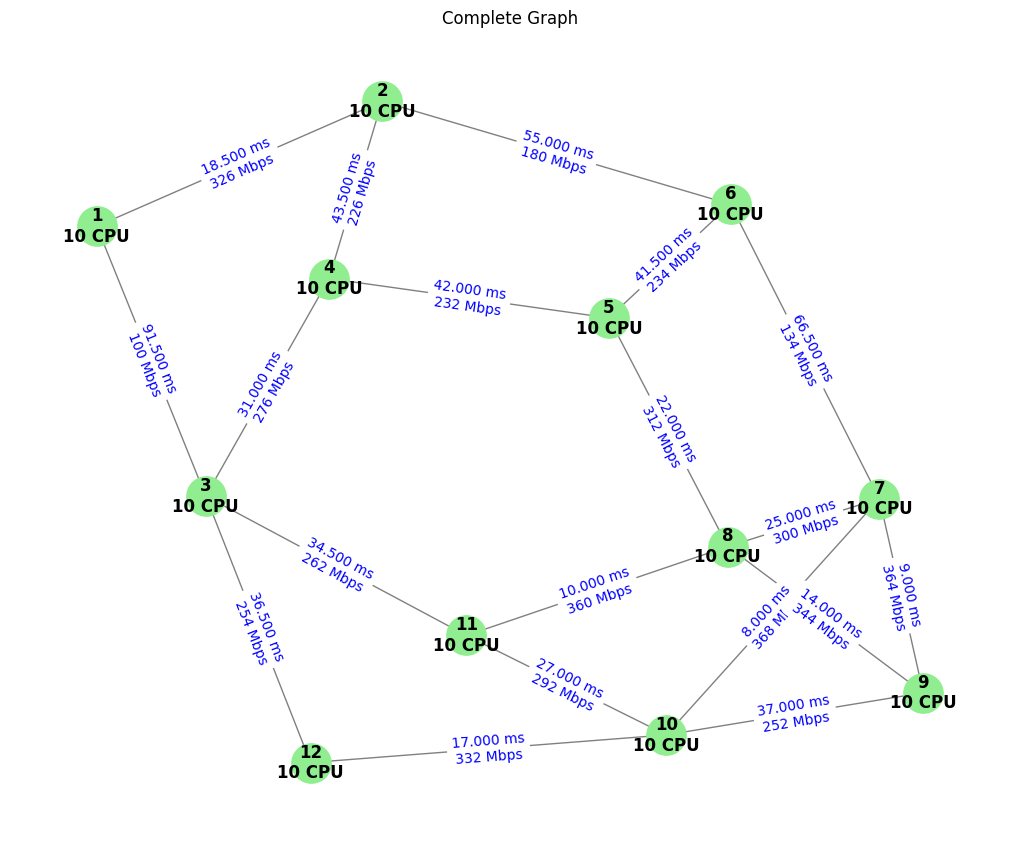

In [2]:
from topology import generate_complete_graph, draw_graph, topologie_finlande

G = topologie_finlande()
draw_graph(G)


In [3]:
G = topologie_finlande()
node_capacity_base = {n: G.nodes[n]["cpu"] for n in G.nodes}
link_capacity_base = {(u, v): G[u][v]["bandwidth"] for u, v in G.edges}

In [4]:
from generate_slices import generate_random_slices
from a_star import run_astar
from run_abo_full_batch import run_abo_full_batch
from run_fabo_full_batch import run_fabo_full_batch
from first_fit import run_first_fit
from best_fit import run_best_fit
G = topologie_finlande()



In [5]:
slices = [

    # Slice 0
    (
        [
            {"id": "vnf0_0", "cpu": 2, "throughput": 40, "slice": 0},
            {"id": "vnf0_1", "cpu": 2, "throughput": 40, "slice": 0},
            {"id": "vnf0_2", "cpu": 2, "throughput": 40, "slice": 0},
        ],
        [
            {"from": "vnf0_0", "to": "vnf0_1", "bandwidth": 40, "latency": 100},
            {"from": "vnf0_1", "to": "vnf0_2", "bandwidth": 40, "latency": 100},
        ]
    ),

    # Slice 1
    (
        [
            {"id": "vnf1_0", "cpu": 2, "throughput": 40, "slice": 1},
            {"id": "vnf1_1", "cpu": 2, "throughput": 40, "slice": 1},
            {"id": "vnf1_2", "cpu": 2, "throughput": 40, "slice": 1},
        ],
        [
            {"from": "vnf1_0", "to": "vnf1_1", "bandwidth": 40, "latency": 100},
            {"from": "vnf1_1", "to": "vnf1_2", "bandwidth": 40, "latency": 100},
        ]
    ),

    # Slice 2
    (
        [
            {"id": "vnf2_0", "cpu": 2, "throughput": 30, "slice": 2},
            {"id": "vnf2_1", "cpu": 2, "throughput": 30, "slice": 2},
            {"id": "vnf2_2", "cpu": 2, "throughput": 30, "slice": 2},
        ],
        [
            {"from": "vnf2_0", "to": "vnf2_1", "bandwidth": 30, "latency": 120},
            {"from": "vnf2_1", "to": "vnf2_2", "bandwidth": 30, "latency": 120},
        ]
    ),

    # Slice 3
    (
        [
            {"id": "vnf3_0", "cpu": 2, "throughput": 50, "slice": 3},
            {"id": "vnf3_1", "cpu": 2, "throughput": 50, "slice": 3},
            {"id": "vnf3_2", "cpu": 2, "throughput": 50, "slice": 3},
        ],
        [
            {"from": "vnf3_0", "to": "vnf3_1", "bandwidth": 50, "latency": 120},
            {"from": "vnf3_1", "to": "vnf3_2", "bandwidth": 50, "latency": 120},
        ]
    ),

    # Slice 4
    (
        [
            {"id": "vnf4_0", "cpu": 3, "throughput": 60, "slice": 4},
            {"id": "vnf4_1", "cpu": 3, "throughput": 60, "slice": 4},
            {"id": "vnf4_2", "cpu": 3, "throughput": 60, "slice": 4},
        ],
        [
            {"from": "vnf4_0", "to": "vnf4_1", "bandwidth": 60, "latency": 150},
            {"from": "vnf4_1", "to": "vnf4_2", "bandwidth": 60, "latency": 150},
        ]
    ),

    # Slice 5
    (
        [
            {"id": "vnf5_0", "cpu": 4, "throughput": 70, "slice": 5},
            {"id": "vnf5_1", "cpu": 4, "throughput": 70, "slice": 5},
            {"id": "vnf5_2", "cpu": 4, "throughput": 70, "slice": 5},
        ],
        [
            {"from": "vnf5_0", "to": "vnf5_1", "bandwidth": 70, "latency": 180},
            {"from": "vnf5_1", "to": "vnf5_2", "bandwidth": 70, "latency": 180},
        ]
    ),
]


In [6]:
slices = [

    # Slice 0
    (
        [
            {"id": "vnf0_0", "cpu": 1, "throughput": 20, "slice": 0},
            {"id": "vnf0_1", "cpu": 1, "throughput": 20, "slice": 0},
            {"id": "vnf0_2", "cpu": 1, "throughput": 20, "slice": 0},
        ],
        [
            {"from": "vnf0_0", "to": "vnf0_1", "bandwidth": 20, "latency": 200},
            {"from": "vnf0_1", "to": "vnf0_2", "bandwidth": 20, "latency": 200},
        ]
    ),

    # Slice 1
    (
        [
            {"id": "vnf1_0", "cpu": 1, "throughput": 20, "slice": 1},
            {"id": "vnf1_1", "cpu": 1, "throughput": 20, "slice": 1},
            {"id": "vnf1_2", "cpu": 1, "throughput": 20, "slice": 1},
        ],
        [
            {"from": "vnf1_0", "to": "vnf1_1", "bandwidth": 20, "latency": 200},
            {"from": "vnf1_1", "to": "vnf1_2", "bandwidth": 20, "latency": 200},
        ]
    ),

    # Slice 2
    (
        [
            {"id": "vnf2_0", "cpu": 1, "throughput": 20, "slice": 2},
            {"id": "vnf2_1", "cpu": 1, "throughput": 20, "slice": 2},
            {"id": "vnf2_2", "cpu": 1, "throughput": 20, "slice": 2},
        ],
        [
            {"from": "vnf2_0", "to": "vnf2_1", "bandwidth": 20, "latency": 200},
            {"from": "vnf2_1", "to": "vnf2_2", "bandwidth": 20, "latency": 200},
        ]
    ),

    # Slice 3
    (
        [
            {"id": "vnf3_0", "cpu": 1, "throughput": 20, "slice": 3},
            {"id": "vnf3_1", "cpu": 1, "throughput": 20, "slice": 3},
            {"id": "vnf3_2", "cpu": 1, "throughput": 20, "slice": 3},
        ],
        [
            {"from": "vnf3_0", "to": "vnf3_1", "bandwidth": 20, "latency": 200},
            {"from": "vnf3_1", "to": "vnf3_2", "bandwidth": 20, "latency": 200},
        ]
    ),

    # Slice 4
    (
        [
            {"id": "vnf4_0", "cpu": 1, "throughput": 20, "slice": 4},
            {"id": "vnf4_1", "cpu": 1, "throughput": 20, "slice": 4},
            {"id": "vnf4_2", "cpu": 1, "throughput": 20, "slice": 4},
        ],
        [
            {"from": "vnf4_0", "to": "vnf4_1", "bandwidth": 20, "latency": 200},
            {"from": "vnf4_1", "to": "vnf4_2", "bandwidth": 20, "latency": 200},
        ]
    ),

    # Slice 5
    (
        [
            {"id": "vnf5_0", "cpu": 1, "throughput": 20, "slice": 5},
            {"id": "vnf5_1", "cpu": 1, "throughput": 20, "slice": 5},
            {"id": "vnf5_2", "cpu": 1, "throughput": 20, "slice": 5},
        ],
        [
            {"from": "vnf5_0", "to": "vnf5_1", "bandwidth": 20, "latency": 200},
            {"from": "vnf5_1", "to": "vnf5_2", "bandwidth": 20, "latency": 200},
        ]
    ),
]


In [7]:
node_capacity_base = {n: G.nodes[n]["cpu"] for n in G.nodes}
link_capacity_base = {(u, v): G[u][v]["bandwidth"] for u, v in G.edges}
link_capacity_base.update({(v, u): G[u][v]["bandwidth"] for u, v in G.edges})
link_latency = {(u, v): G[u][v]["latency"] for u, v in G.edges}
link_latency.update({(v, u): G[u][v]["latency"] for u, v in G.edges})



In [8]:
from copy import deepcopy

slices = deepcopy(slices)


In [9]:

df_astar, results_astar = run_astar(G, slices, node_capacity_base, link_capacity_base)
df_astar

,slice,accepted,g_cost
0,1,True,17.0
1,2,True,17.0
2,3,True,17.0
3,4,True,17.0
4,5,True,17.0
5,6,True,17.0


In [10]:
df_abo, abo_results = run_abo_full_batch(G, slices, node_capacity_base, link_latency ,link_capacity_base)
df_abo

,slice,accepted,g_cost
0,1,True,57.0
1,2,True,57.0
2,3,True,57.0
3,4,True,57.0
4,5,True,57.0
5,6,True,57.0


In [11]:
df_fabo, fabo_results = run_fabo_full_batch(G, slices, node_capacity_base, link_latency, link_capacity_base)
df_fabo

Running FABO: 100%|██████████| 6/6 [00:00<00:00, 14.37slice/s]


,slice,accepted,g_cost
0,1,True,40.0
1,2,True,40.0
2,3,True,40.0
3,4,True,40.0
4,5,True,40.0
5,6,True,40.0


In [12]:
df_ff, ff_results = run_first_fit(G, slices, node_capacity_base, link_capacity_base, link_latency)
df_ff

🔄 Starting Slice 1
✅ Placed vnf0_0 on Node 1
✅ Placed vnf0_1 on Node 2
→ Routed VL vnf0_0->vnf0_1 via [1, 2]
✅ Placed vnf0_2 on Node 3
→ Routed VL vnf0_1->vnf0_2 via [2, 4, 3]
🔄 Starting Slice 2
✅ Placed vnf1_0 on Node 1
✅ Placed vnf1_1 on Node 2
→ Routed VL vnf1_0->vnf1_1 via [1, 2]
✅ Placed vnf1_2 on Node 3
→ Routed VL vnf1_1->vnf1_2 via [2, 4, 3]
🔄 Starting Slice 3
✅ Placed vnf2_0 on Node 1
✅ Placed vnf2_1 on Node 2
→ Routed VL vnf2_0->vnf2_1 via [1, 2]
✅ Placed vnf2_2 on Node 3
→ Routed VL vnf2_1->vnf2_2 via [2, 4, 3]
🔄 Starting Slice 4
✅ Placed vnf3_0 on Node 1
✅ Placed vnf3_1 on Node 2
→ Routed VL vnf3_0->vnf3_1 via [1, 2]
✅ Placed vnf3_2 on Node 3
→ Routed VL vnf3_1->vnf3_2 via [2, 4, 3]
🔄 Starting Slice 5
✅ Placed vnf4_0 on Node 1
✅ Placed vnf4_1 on Node 2
→ Routed VL vnf4_0->vnf4_1 via [1, 2]
✅ Placed vnf4_2 on Node 3
→ Routed VL vnf4_1->vnf4_2 via [2, 4, 3]
🔄 Starting Slice 6
✅ Placed vnf5_0 on Node 1
✅ Placed vnf5_1 on Node 2
→ Routed VL vnf5_0->vnf5_1 via [1, 2]
✅ Placed vn

,slice,accepted
0,1,True
1,2,True
2,3,True
3,4,True
4,5,True
5,6,True


In [13]:
df_bestfit, bestfit_results = run_best_fit(G, slices, node_capacity_base, link_capacity_base, link_latency)
df_bestfit


🔄 Processing Slice 1

🔄 Processing Slice 2

🔄 Processing Slice 3

🔄 Processing Slice 4

🔄 Processing Slice 5

🔄 Processing Slice 6


,slice,accepted,g_cost
0,1,True,93.0
1,2,True,93.0
2,3,True,93.0
3,4,True,93.0
4,5,True,93.0
5,6,True,93.0


,Method,Slices Accepted,Total Slices,Acceptance Rate,Total CPU utilized
0,A*,6,6,1.0,18
1,ABO,6,6,1.0,18
2,FABO,6,6,1.0,18
3,First Fit,6,6,1.0,18
4,Best Fit,6,6,1.0,18


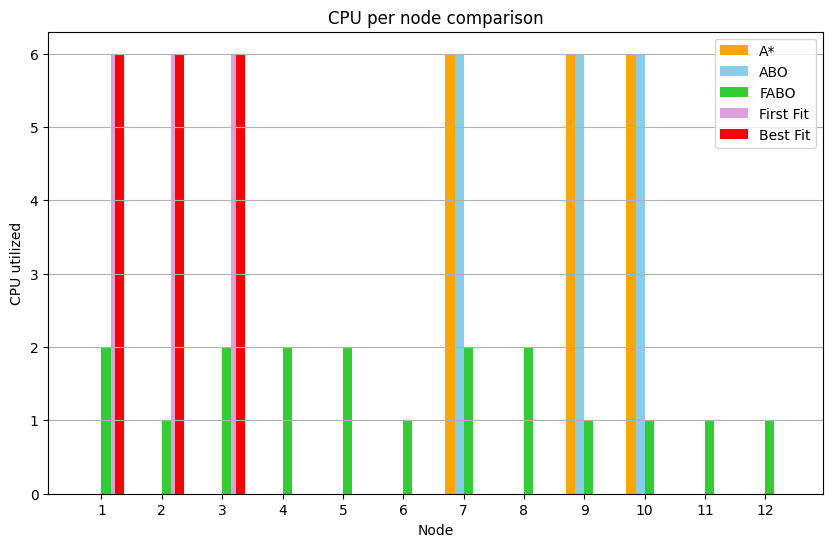

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

node_capacity = {n: 10 for n in range(1, 13)}

def process_results(results, method_name, slices):
    used_node_capacity = {n: 0 for n in range(1, 13)}
    accepted_slices = 0
    cpu_total_used = 0
    per_node_details = {n: [] for n in range(1, 13)}

    for slice_id, result in enumerate(results):
        if result:
            accepted_slices += 1
            vnf_chain = slices[slice_id][0]
            vnf_cpu_map = {vnf["id"]: vnf["cpu"] for vnf in vnf_chain}

            for vnf_id, node in result.placed_vnfs.items():
                slice_id = int(vnf_id.split("_")[0][-1])
                vnf_index = int(vnf_id.split("_")[1])
                vnf_cpu = slices[slice_id][0][vnf_index]["cpu"]

                used_node_capacity[node] += vnf_cpu
                cpu_total_used += vnf_cpu
                per_node_details[node].append(vnf_id)

    total = len(results) if results else 1  

    return {
        "method": method_name,
        "accepted": accepted_slices,
        "total": len(results),
        "rate": accepted_slices / total,
        "cpu": cpu_total_used,
        "usage": used_node_capacity,
        "vnfs": per_node_details
    }


# Process all methods (make sure these variables exist)
methods_data = []
if 'results_astar' in globals():
    methods_data.append(process_results(results_astar, "A*", slices))
if 'abo_results' in globals():
    methods_data.append(process_results(abo_results, "ABO", slices))
if 'fabo_results' in globals():
    methods_data.append(process_results(fabo_results, "FABO", slices))
if 'ff_results' in globals():
    methods_data.append(process_results(ff_results, "First Fit", slices))
if 'bestfit_results' in globals():
    methods_data.append(process_results(bestfit_results, "Best Fit", slices))

for method in methods_data:
    for node, cpu_used in method["usage"].items():
        if cpu_used > node_capacity[node]:
            print(f"❌ Overcapacity in method {method['method']} on node {node}: {cpu_used} > {node_capacity[node]}")


# Build summary table
summary_table = pd.DataFrame([
    {
        "Method": data["method"],
        "Slices Accepted": data["accepted"],
        "Total Slices": data["total"],
        "Acceptance Rate": round(data["rate"], 2),
        "Total CPU utilized": data["cpu"]
    }
    for data in methods_data
])
display(summary_table)

# Plot comparison
fig, ax = plt.subplots(figsize=(10, 6))
nodes = list(node_capacity.keys())
bar_width = 0.15
colors = ["orange", "skyblue", "limegreen", "plum", "red"]
offsets = [-1.5, -0.5, 0.5, 1.5, 2.0]

for idx, data in enumerate(methods_data):
    usage = [data["usage"][n] for n in nodes]
    positions = [n + offsets[idx]*bar_width for n in nodes]
    ax.bar(positions, usage, width=bar_width, label=data["method"], color=colors[idx % len(colors)])

ax.set_title("CPU per node comparison")
ax.set_xlabel("Node")
ax.set_ylabel("CPU utilized")
ax.set_xticks(nodes)
ax.legend()
plt.grid(axis='y')
plt.show()


In [15]:
from compute_energy import (
    compute_energy_per_node,
    compute_total_bandwidth,
    compute_total_latency,
    compute_energy_per_slice,
    compute_total_energy_with_routing
)

# Compute energy, bandwidth and latency for all methods
method_results = {
    "A*": results_astar,
    "ABO": abo_results,
    "FABO": fabo_results,
    "First Fit": ff_results,
    "Best-fit": bestfit_results
}

comparison_rows = []
for method_name, result_list in method_results.items():
    if not result_list:
        continue

    energy_per_slice, _ = compute_energy_per_slice(result_list, slices, node_capacity_base)
    _, total_energy = compute_energy_per_node(result_list, slices, node_capacity_base)
    total_bw = compute_total_bandwidth(result_list, slices)
    total_lat = compute_total_latency(result_list, link_latency)
    
    total_energy_with_routing = sum(
        compute_total_energy_with_routing(r, slices, node_capacity_base, G)
        for r in result_list if r is not None
    )
       
    comparison_rows.append({
        "Method": method_name,
        "Slices Accepted": sum(1 for e in energy_per_slice if e is not None),
        "Total Energy": total_energy,
        "Total Bandwidth": sum(b for b in total_bw if b is not None),
        "Total Latency": sum(l for l in total_lat if l is not None),
     
    })

df_metrics = pd.DataFrame(comparison_rows)
display(df_metrics)


,Method,Slices Accepted,Total Energy,Total Bandwidth,Total Latency
0,A*,6,51,240,102.0
1,ABO,6,51,240,102.0
2,FABO,6,96,240,423.5
3,First Fit,6,51,240,558.0
4,Best-fit,6,51,240,558.0


## 🌱 Scenario 1 — Few Slices, Low Load

**Objective:** Simulate a lightweight environment with few services, ideal for observing the baseline behavior of the algorithms.

- **Number of Slices:** 5
- **VNFs per Slice:** 2
- **VNF Profiles:** Random between 2 and 8 CPUs
- **Bandwidth (Throughput):** 140 to 175 Mbps
- **Latency between VNFs:** 120 to 250 ms

> This scenario serves as a baseline for comparing acceptance, consumption, and routing performance.

In [16]:
from generate_slices import generate_random_slices

vnf_profiles = [
    {"cpu": 2, "throughput": 140, "latency": 120},
    {"cpu": 4, "throughput": 150, "latency": 180},
    {"cpu": 6, "throughput": 160, "latency": 220},
    {"cpu": 8, "throughput": 175, "latency": 250}
]

slices_1 = generate_random_slices(G, vnf_profiles, num_slices=5, num_vnfs_per_slice=2)

slices_1 = deepcopy(slices_1)

slices_1

[([{'id': 'vnf0_0', 'cpu': 2, 'throughput': 140, 'latency': 120, 'slice': 0},
   {'id': 'vnf0_1', 'cpu': 2, 'throughput': 140, 'latency': 120, 'slice': 0}],
  [{'from': 'vnf0_0', 'to': 'vnf0_1', 'bandwidth': 140, 'latency': 120}]),
 ([{'id': 'vnf1_0', 'cpu': 6, 'throughput': 160, 'latency': 220, 'slice': 1},
   {'id': 'vnf1_1', 'cpu': 4, 'throughput': 150, 'latency': 180, 'slice': 1}],
  [{'from': 'vnf1_0', 'to': 'vnf1_1', 'bandwidth': 160, 'latency': 220}]),
 ([{'id': 'vnf2_0', 'cpu': 4, 'throughput': 150, 'latency': 180, 'slice': 2},
   {'id': 'vnf2_1', 'cpu': 4, 'throughput': 150, 'latency': 180, 'slice': 2}],
  [{'from': 'vnf2_0', 'to': 'vnf2_1', 'bandwidth': 150, 'latency': 180}]),
 ([{'id': 'vnf3_0', 'cpu': 2, 'throughput': 140, 'latency': 120, 'slice': 3},
   {'id': 'vnf3_1', 'cpu': 2, 'throughput': 140, 'latency': 120, 'slice': 3}],
  [{'from': 'vnf3_0', 'to': 'vnf3_1', 'bandwidth': 140, 'latency': 120}]),
 ([{'id': 'vnf4_0', 'cpu': 8, 'throughput': 175, 'latency': 250, 'slice'

In [17]:
for n in G.nodes:
    print(f"Nó {n}: {G.nodes[n]['cpu']} CPUs disponíveis")


Nó 1: 10 CPUs disponíveis
Nó 2: 10 CPUs disponíveis
Nó 3: 10 CPUs disponíveis
Nó 4: 10 CPUs disponíveis
Nó 5: 10 CPUs disponíveis
Nó 6: 10 CPUs disponíveis
Nó 7: 10 CPUs disponíveis
Nó 8: 10 CPUs disponíveis
Nó 9: 10 CPUs disponíveis
Nó 10: 10 CPUs disponíveis
Nó 11: 10 CPUs disponíveis
Nó 12: 10 CPUs disponíveis


In [18]:

df_astar_scnr1, results_astar_scnr1 = run_astar(G, slices_1, node_capacity_base, link_capacity_base)
df_astar_scnr1

,slice,accepted,g_cost
0,1,True,8.0
1,2,True,8.0
2,3,True,9.0
3,4,True,10.0
4,5,True,10.0


In [19]:
df_abo_scnr1, abo_results_scnr1 = run_abo_full_batch(G, slices_1, node_capacity_base, link_latency ,link_capacity_base)
df_abo_scnr1

,slice,accepted,g_cost
0,1,True,148.0
1,2,True,169.0
2,3,True,160.0
3,4,True,154.0
4,5,True,183.0


In [20]:
df_fabo_scnr1, fabo_results_scnr1 = run_fabo_full_batch(G, slices_1, node_capacity_base, link_latency, link_capacity_base)
df_fabo_scnr1

Running FABO: 100%|██████████| 5/5 [00:00<00:00, 112.82slice/s]


,slice,accepted,g_cost
0,1,True,140.0
1,2,True,160.0
2,3,True,150.0
3,4,True,140.0
4,5,True,175.0


In [21]:
df_ff_scnr1, ff_results_scnr1 = run_first_fit(G, slices_1, node_capacity_base, link_capacity_base, link_latency)
df_ff_scnr1

🔄 Starting Slice 1
✅ Placed vnf0_0 on Node 1
✅ Placed vnf0_1 on Node 2
→ Routed VL vnf0_0->vnf0_1 via [1, 2]
🔄 Starting Slice 2
✅ Placed vnf1_0 on Node 1
✅ Placed vnf1_1 on Node 2
→ Routed VL vnf1_0->vnf1_1 via [1, 2]
🔄 Starting Slice 3
✅ Placed vnf2_0 on Node 2
✅ Placed vnf2_1 on Node 3
→ Routed VL vnf2_0->vnf2_1 via [2, 4, 3]
🔄 Starting Slice 4
✅ Placed vnf3_0 on Node 1
✅ Placed vnf3_1 on Node 3
❌ Not enough bandwidth for VL vnf3_0->vnf3_1
🔄 Starting Slice 5
✅ Placed vnf4_0 on Node 4
✅ Placed vnf4_1 on Node 3
❌ Not enough bandwidth for VL vnf4_0->vnf4_1


,slice,accepted
0,1,True
1,2,True
2,3,True
3,4,False
4,5,False


In [22]:
df_bestfit_scnr1, bestfit_results_scnr1 = run_best_fit(G, slices_1, node_capacity_base, link_capacity_base, link_latency)
df_bestfit_scnr1


🔄 Processing Slice 1

🔄 Processing Slice 2

🔄 Processing Slice 3

🔄 Processing Slice 4
❌ Failed to place VNF vnf3_1

🔄 Processing Slice 5


,slice,accepted,g_cost
0,1,True,18.5
1,2,True,18.5
2,3,True,74.5
3,4,False,NaN
4,5,True,42.0


,Method,Slices Accepted,Total Slices,Acceptance Rate,Total CPU utilized
0,A*,5,5,1.0,10
1,ABO,5,5,1.0,10
2,FABO,5,5,1.0,10
3,First Fit,3,5,0.6,6
4,Best Fit,4,5,0.8,8


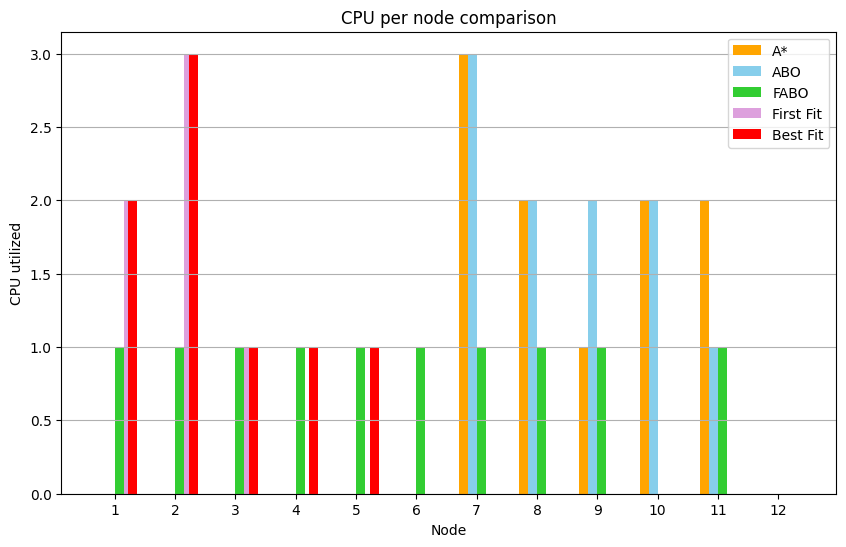

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

node_capacity = {n: 10 for n in range(1, 13)}

def process_results(results, method_name, slices):
    used_node_capacity = {n: 0 for n in range(1, 13)}
    accepted_slices = 0
    cpu_total_used = 0
    per_node_details = {n: [] for n in range(1, 13)}

    for slice_id, result in enumerate(results):
        if result:
            accepted_slices += 1
            vnf_chain = slices[slice_id][0]
            vnf_cpu_map = {vnf["id"]: vnf["cpu"] for vnf in vnf_chain}

            for vnf_id, node in result.placed_vnfs.items():
                slice_id = int(vnf_id.split("_")[0][-1])
                vnf_index = int(vnf_id.split("_")[1])
                vnf_cpu = slices[slice_id][0][vnf_index]["cpu"]

                used_node_capacity[node] += vnf_cpu
                cpu_total_used += vnf_cpu
                per_node_details[node].append(vnf_id)

    total = len(results) if results else 1  

    return {
        "method": method_name,
        "accepted": accepted_slices,
        "total": len(results),
        "rate": accepted_slices / total,
        "cpu": cpu_total_used,
        "usage": used_node_capacity,
        "vnfs": per_node_details
    }


# Process all methods (make sure these variables exist)
methods_data = []
if 'results_astar' in globals():
    methods_data.append(process_results(results_astar_scnr1, "A*", slices))
if 'abo_results' in globals():
    methods_data.append(process_results(abo_results_scnr1, "ABO", slices))
if 'fabo_results' in globals():
    methods_data.append(process_results(fabo_results_scnr1, "FABO", slices))
if 'ff_results' in globals():
    methods_data.append(process_results(ff_results_scnr1, "First Fit", slices))
if 'bestfit_results' in globals():
    methods_data.append(process_results(bestfit_results_scnr1, "Best Fit", slices))

for method in methods_data:
    for node, cpu_used in method["usage"].items():
        if cpu_used > node_capacity[node]:
            print(f"❌ Overcapacity in method {method['method']} on node {node}: {cpu_used} > {node_capacity[node]}")


# Build summary table
summary_table = pd.DataFrame([
    {
        "Method": data["method"],
        "Slices Accepted": data["accepted"],
        "Total Slices": data["total"],
        "Acceptance Rate": round(data["rate"], 2),
        "Total CPU utilized": data["cpu"]
    }
    for data in methods_data
])
display(summary_table)

# Plot comparison
fig, ax = plt.subplots(figsize=(10, 6))
nodes = list(node_capacity.keys())
bar_width = 0.15
colors = ["orange", "skyblue", "limegreen", "plum", "red"]
offsets = [-1.5, -0.5, 0.5, 1.5, 2.0]

for idx, data in enumerate(methods_data):
    usage = [data["usage"][n] for n in nodes]
    positions = [n + offsets[idx]*bar_width for n in nodes]
    ax.bar(positions, usage, width=bar_width, label=data["method"], color=colors[idx % len(colors)])

ax.set_title("CPU per node comparison")
ax.set_xlabel("Node")
ax.set_ylabel("CPU utilized")
ax.set_xticks(nodes)
ax.legend()
plt.grid(axis='y')
plt.show()


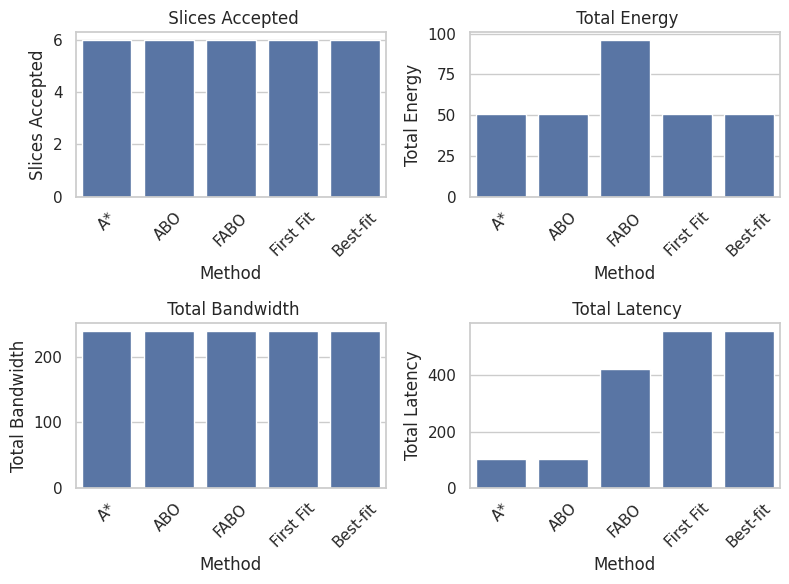

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Slices aceitos
plt.subplot(2, 3, 1)
sns.barplot(data=df_metrics, x="Method", y="Slices Accepted")
plt.title(" Slices Accepted")
plt.xticks(rotation=45)

# Energia total
plt.subplot(2, 3, 2)
sns.barplot(data=df_metrics, x="Method", y="Total Energy")
plt.title(" Total Energy")
plt.xticks(rotation=45)


# Banda total
plt.subplot(2, 3, 4)
sns.barplot(data=df_metrics, x="Method", y="Total Bandwidth")
plt.title(" Total Bandwidth")
plt.xticks(rotation=45)

# Latência total
plt.subplot(2, 3, 5)
sns.barplot(data=df_metrics, x="Method", y="Total Latency")
plt.title(" Total Latency")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## ⚖️ Scenario 2 — Moderate Load, More Services

**Objective:** Simulate a moderately loaded environment with 10 concurrent slices, allowing clearer observation of how algorithms begin to scale under pressure.

- **Number of Slices:** 10  
- **VNFs per Slice:** 3  
- **VNF Profiles:** Random between 2 and 8 CPUs  
- **Bandwidth (Throughput):** 140 to 175 Mbps  
- **Latency between VNFs:** 120 to 250 ms  

> This scenario represents a gentle increase in system load, helping identify early signs of resource contention or degradation in performance.


In [25]:
vnf_profiles = [
    {"cpu": 2, "throughput": 140, "latency": 120},
    {"cpu": 4, "throughput": 150, "latency": 180},
    {"cpu": 6, "throughput": 160, "latency": 200},
    {"cpu": 8, "throughput": 175, "latency": 250}
]

from generate_slices import generate_random_slices

slices_2= generate_random_slices(G, vnf_profiles, num_slices=10, num_vnfs_per_slice=3)

slices_2= deepcopy(slices_2)

slices_2

[([{'id': 'vnf0_0', 'cpu': 2, 'throughput': 140, 'latency': 120, 'slice': 0},
   {'id': 'vnf0_1', 'cpu': 2, 'throughput': 140, 'latency': 120, 'slice': 0},
   {'id': 'vnf0_2', 'cpu': 4, 'throughput': 150, 'latency': 180, 'slice': 0}],
  [{'from': 'vnf0_0', 'to': 'vnf0_1', 'bandwidth': 140, 'latency': 120},
   {'from': 'vnf0_1', 'to': 'vnf0_2', 'bandwidth': 140, 'latency': 120}]),
 ([{'id': 'vnf1_0', 'cpu': 4, 'throughput': 150, 'latency': 180, 'slice': 1},
   {'id': 'vnf1_1', 'cpu': 2, 'throughput': 140, 'latency': 120, 'slice': 1},
   {'id': 'vnf1_2', 'cpu': 4, 'throughput': 150, 'latency': 180, 'slice': 1}],
  [{'from': 'vnf1_0', 'to': 'vnf1_1', 'bandwidth': 150, 'latency': 180},
   {'from': 'vnf1_1', 'to': 'vnf1_2', 'bandwidth': 140, 'latency': 120}]),
 ([{'id': 'vnf2_0', 'cpu': 8, 'throughput': 175, 'latency': 250, 'slice': 2},
   {'id': 'vnf2_1', 'cpu': 4, 'throughput': 150, 'latency': 180, 'slice': 2},
   {'id': 'vnf2_2', 'cpu': 8, 'throughput': 175, 'latency': 250, 'slice': 2}],

In [26]:

df_astar_scnr2, results_astar_scnr2 = run_astar(G, slices_2, node_capacity_base, link_capacity_base)
df_abo_scnr2, abo_results_scnr2 = run_abo_full_batch(G, slices_2, node_capacity_base, link_latency ,link_capacity_base)
df_fabo_scnr2, fabo_results_scnr2 = run_fabo_full_batch(G, slices_2, node_capacity_base, link_latency, link_capacity_base)
df_ff_scnr2, ff_results_scnr2 = run_first_fit(G, slices_2, node_capacity_base, link_capacity_base, link_latency)
df_bestfit_scnr2, bestfit_results_scnr2 = run_best_fit(G, slices_2, node_capacity_base, link_capacity_base, link_latency)


df_astar_scnr2
df_abo_scnr2
df_fabo_scnr2
df_bestfit_scnr2

Running FABO: 100%|██████████| 10/10 [00:00<00:00, 57.44slice/s]

🔄 Starting Slice 1
✅ Placed vnf0_0 on Node 1
✅ Placed vnf0_1 on Node 2
→ Routed VL vnf0_0->vnf0_1 via [1, 2]
✅ Placed vnf0_2 on Node 3
→ Routed VL vnf0_1->vnf0_2 via [2, 4, 3]
🔄 Starting Slice 2
✅ Placed vnf1_0 on Node 1
✅ Placed vnf1_1 on Node 2
→ Routed VL vnf1_0->vnf1_1 via [1, 2]
✅ Placed vnf1_2 on Node 3
❌ Not enough bandwidth for VL vnf1_1->vnf1_2
🔄 Starting Slice 3
✅ Placed vnf2_0 on Node 4
✅ Placed vnf2_1 on Node 1
→ Routed VL vnf2_0->vnf2_1 via [4, 2, 1]
✅ Placed vnf2_2 on Node 5
❌ Not enough bandwidth for VL vnf2_1->vnf2_2
🔄 Starting Slice 4
✅ Placed vnf3_0 on Node 2
✅ Placed vnf3_1 on Node 3
❌ Not enough bandwidth for VL vnf3_0->vnf3_1
🔄 Starting Slice 5
✅ Placed vnf4_0 on Node 6
✅ Placed vnf4_1 on Node 7
❌ Not enough bandwidth for VL vnf4_0->vnf4_1
🔄 Starting Slice 6
✅ Placed vnf5_0 on Node 7
✅ Placed vnf5_1 on Node 8
→ Routed VL vnf5_0->vnf5_1 via [7, 9, 8]
✅ Placed vnf5_2 on Node 9
→ Routed VL vnf5_1->vnf5_2 via [8, 9]
🔄 Starting Slice 7
✅ Placed vnf6_0 on Node 4
✅ Placed

,slice,accepted,g_cost
0,1,True,93.0
1,2,True,93.0
2,3,True,83.5
3,4,True,128.5
4,5,True,67.0
5,6,True,31.0
6,7,True,94.5
7,8,False,NaN
8,9,True,34.0
9,10,False,NaN


In [27]:
df_abo_scnr2

,slice,accepted,g_cost
0,1,True,315.0
1,2,True,327.0
2,3,True,362.0
3,4,True,370.0
4,5,True,418.5
5,6,False,NaN
6,7,False,NaN
7,8,True,392.0
8,9,False,NaN
9,10,True,386.0


,Method,Slices Accepted,Total Slices,Acceptance Rate,Total CPU utilized
0,A*,7,10,0.7,96
1,ABO,7,10,0.7,96
2,FABO,7,10,0.7,96
3,First Fit,4,10,0.4,48
4,Best Fit,8,10,0.8,112


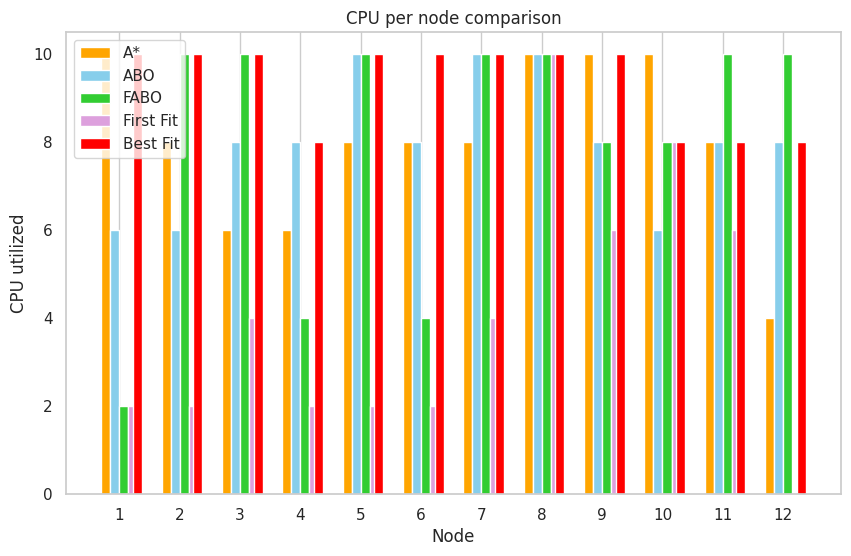

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Define node capacity for visualization
node_capacity = {n: 10 for n in range(1, 13)}

def process_results(results, method_name, slices):
    """
    Process the placement results of one method to compute:
    - number of accepted slices
    - total CPU used
    - per-node CPU usage
    - VNFs allocated per node
    """
    used_node_capacity = {n: 0 for n in range(1, 13)}
    accepted_slices = 0
    cpu_total_used = 0
    per_node_details = {n: [] for n in range(1, 13)}

    for slice_idx, result in enumerate(results):
        if result:
            accepted_slices += 1
            vnf_chain = slices[slice_idx][0]
            # Build a map {vnf_id -> cpu} for this slice
            vnf_cpu_map = {vnf["id"]: vnf["cpu"] for vnf in vnf_chain}

            for vnf_id, node in result.placed_vnfs.items():
                # Use the precomputed cpu map (avoid ID parsing errors)
                vnf_cpu = vnf_cpu_map[vnf_id]

                used_node_capacity[node] += vnf_cpu
                cpu_total_used += vnf_cpu
                per_node_details[node].append(vnf_id)

    total = len(results) if results else 1  

    return {
        "method": method_name,
        "accepted": accepted_slices,
        "total": len(results),
        "rate": accepted_slices / total,
        "cpu": cpu_total_used,
        "usage": used_node_capacity,
        "vnfs": per_node_details
    }

# ----------------- PROCESS ALL METHODS -----------------
methods_data = []
if 'results_astar_scnr2' in globals():
    methods_data.append(process_results(results_astar_scnr2, "A*", slices_2))
if 'abo_results_scnr2' in globals():
    methods_data.append(process_results(abo_results_scnr2, "ABO", slices_2))
if 'fabo_results_scnr2' in globals():
    methods_data.append(process_results(fabo_results_scnr2, "FABO", slices_2))
if 'ff_results_scnr2' in globals():
    methods_data.append(process_results(ff_results_scnr2, "First Fit", slices_2))
if 'bestfit_results_scnr2' in globals():
    methods_data.append(process_results(bestfit_results_scnr2, "Best Fit", slices_2))

# ----------------- CHECK FOR OVERCAPACITY -----------------
for method in methods_data:
    for node, cpu_used in method["usage"].items():
        if cpu_used > node_capacity[node]:
            print(f"[ALERT] Overcapacity in {method['method']} on node {node}: "
                  f"{cpu_used} > {node_capacity[node]}")

# ----------------- SUMMARY TABLE -----------------
summary_table = pd.DataFrame([
    {
        "Method": data["method"],
        "Slices Accepted": data["accepted"],
        "Total Slices": data["total"],
        "Acceptance Rate": round(data["rate"], 2),
        "Total CPU utilized": data["cpu"]
    }
    for data in methods_data
])
display(summary_table)

# ----------------- PLOT COMPARISON -----------------
fig, ax = plt.subplots(figsize=(10, 6))
nodes = list(node_capacity.keys())
bar_width = 0.15
colors = ["orange", "skyblue", "limegreen", "plum", "red"]
offsets = [-1.5, -0.5, 0.5, 1.5, 2.0]

for idx, data in enumerate(methods_data):
    usage = [data["usage"][n] for n in nodes]
    positions = [n + offsets[idx]*bar_width for n in nodes]
    ax.bar(positions, usage, width=bar_width, label=data["method"], color=colors[idx % len(colors)])

ax.set_title("CPU per node comparison")
ax.set_xlabel("Node")
ax.set_ylabel("CPU utilized")
ax.set_xticks(nodes)
ax.legend()
plt.grid(axis='y')
plt.show()



In [29]:
from compute_energy import (
    compute_energy_per_node,
    compute_total_bandwidth,
    compute_total_latency,
    compute_energy_per_slice,
    compute_total_energy_with_routing
)

# Resultados de um cenário (Cenário 2)
method_results_scnr2 = {
    "A*": results_astar_scnr2,
    "ABO": abo_results_scnr2,
    "FABO": fabo_results_scnr2,
    "First Fit": ff_results_scnr2,
    "Best-fit": bestfit_results_scnr2
}

comparison_rows_scnr2 = []

for method_name, result_list in method_results_scnr2.items():
    if not result_list:
        continue

    energy_per_slice, _ = compute_energy_per_slice(result_list, slices_2, node_capacity_base)
    _, total_energy = compute_energy_per_node(result_list, slices_2, node_capacity_base)
    total_bw = compute_total_bandwidth(result_list, slices_2)
    total_lat = compute_total_latency(result_list, link_latency)

    total_energy_with_routing = sum(
        compute_total_energy_with_routing(r, slices_2, node_capacity_base, G)
        for r in result_list if r is not None
    )

    comparison_rows_scnr2.append({
        "Method": method_name,
        "Slices Accepted": sum(1 for e in energy_per_slice if e is not None),
        "Total Energy": total_energy,
        "Total Bandwidth": sum(b for b in total_bw if b is not None),
        "Total Latency": sum(l for l in total_lat if l is not None),
        "Energy with Routing": total_energy_with_routing
    })

df_metrics_scnr2 = pd.DataFrame(comparison_rows_scnr2)
display(df_metrics_scnr2)

# Salvar opcionalmente:
df_metrics_scnr2.to_csv("metrics_scenario_2.csv", index=False)


,Method,Slices Accepted,Total Energy,Total Bandwidth,Total Latency,Energy with Routing
0,A*,7,252,2110,278.0,298.063078
1,ABO,7,252,2145,425.5,298.602266
2,FABO,7,252,2110,345.5,298.347878
3,First Fit,4,151,1160,298.5,157.082016
4,Best-fit,8,284,2410,624.5,346.450460


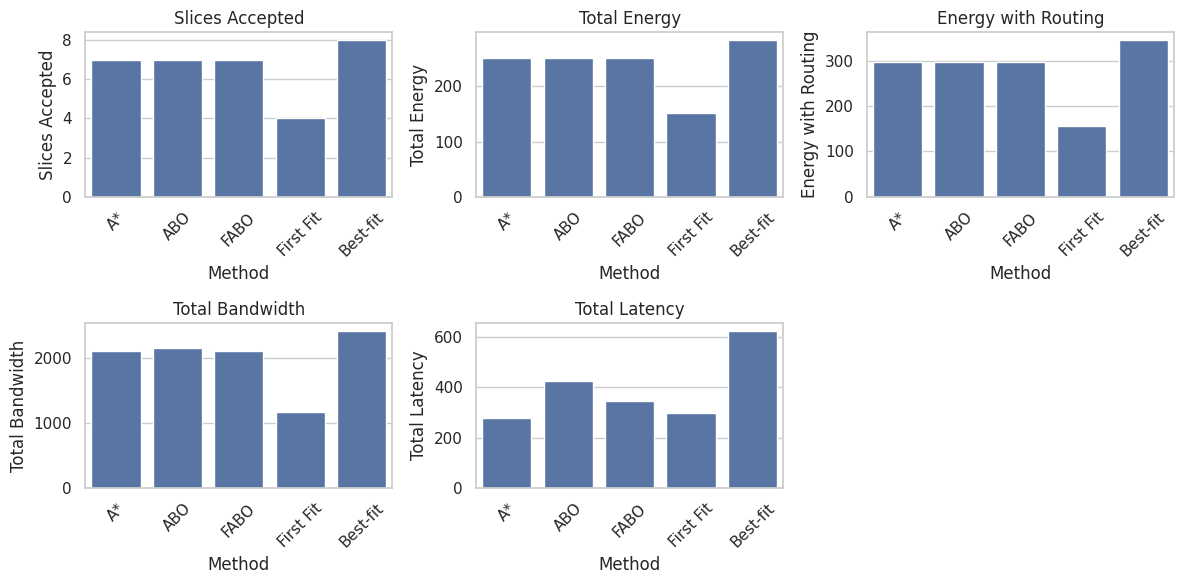

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Slices aceitos
plt.subplot(2, 3, 1)
sns.barplot(data=df_metrics_scnr2, x="Method", y="Slices Accepted")
plt.title("Slices Accepted")
plt.xticks(rotation=45)

# Energia total
plt.subplot(2, 3, 2)
sns.barplot(data=df_metrics_scnr2, x="Method", y="Total Energy")
plt.title("Total Energy")
plt.xticks(rotation=45)

# Energia com roteamento (se existir)
if "Energy with Routing" in df_metrics_scnr2.columns:
    plt.subplot(2, 3, 3)
    sns.barplot(data=df_metrics_scnr2, x="Method", y="Energy with Routing")
    plt.title("Energy with Routing")
    plt.xticks(rotation=45)

# Banda total
plt.subplot(2, 3, 4)
sns.barplot(data=df_metrics_scnr2, x="Method", y="Total Bandwidth")
plt.title("Total Bandwidth")
plt.xticks(rotation=45)

# Latência total
plt.subplot(2, 3, 5)
sns.barplot(data=df_metrics_scnr2, x="Method", y="Total Latency")
plt.title("Total Latency")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## ⚙️ Scenario 3 — Medium-High Load, Concurrent Services

**Objective:** Simulate a denser environment with a higher number of concurrent slices, pushing algorithms to deal with moderate contention in both CPU and bandwidth.

- **Number of Slices:** 20  
- **VNFs per Slice:** 3  
- **VNF Profiles:** Randomized (CPU: 2–8, Throughput: 140–175 Mbps, Latency: 120–250 ms)  
- **Inter-VNF Links:** Use originating VNF's throughput and latency  

> This scenario reflects a more realistic city-level network condition with moderate congestion and service overlap.


In [31]:
vnf_profiles = [
    {"cpu": 2, "throughput": 140, "latency": 120},
    {"cpu": 4, "throughput": 150, "latency": 180},
    {"cpu": 6, "throughput": 160, "latency": 200},
    {"cpu": 8, "throughput": 175, "latency": 250}
]

from generate_slices import generate_random_slices
from copy import deepcopy


slices_3 = generate_random_slices(G, vnf_profiles, num_slices=20, num_vnfs_per_slice=3)
slices_3 = deepcopy(slices_3)

slices_3


[([{'id': 'vnf0_0', 'cpu': 6, 'throughput': 160, 'latency': 200, 'slice': 0},
   {'id': 'vnf0_1', 'cpu': 6, 'throughput': 160, 'latency': 200, 'slice': 0},
   {'id': 'vnf0_2', 'cpu': 4, 'throughput': 150, 'latency': 180, 'slice': 0}],
  [{'from': 'vnf0_0', 'to': 'vnf0_1', 'bandwidth': 160, 'latency': 200},
   {'from': 'vnf0_1', 'to': 'vnf0_2', 'bandwidth': 160, 'latency': 200}]),
 ([{'id': 'vnf1_0', 'cpu': 2, 'throughput': 140, 'latency': 120, 'slice': 1},
   {'id': 'vnf1_1', 'cpu': 2, 'throughput': 140, 'latency': 120, 'slice': 1},
   {'id': 'vnf1_2', 'cpu': 4, 'throughput': 150, 'latency': 180, 'slice': 1}],
  [{'from': 'vnf1_0', 'to': 'vnf1_1', 'bandwidth': 140, 'latency': 120},
   {'from': 'vnf1_1', 'to': 'vnf1_2', 'bandwidth': 140, 'latency': 120}]),
 ([{'id': 'vnf2_0', 'cpu': 6, 'throughput': 160, 'latency': 200, 'slice': 2},
   {'id': 'vnf2_1', 'cpu': 2, 'throughput': 140, 'latency': 120, 'slice': 2},
   {'id': 'vnf2_2', 'cpu': 4, 'throughput': 150, 'latency': 180, 'slice': 2}],

In [32]:

df_astar_scnr3, results_astar_scnr3 = run_astar(G, slices_3, node_capacity_base, link_capacity_base)
df_abo_scnr3, abo_results_scnr3 = run_abo_full_batch(G, slices_3, node_capacity_base, link_latency ,link_capacity_base)
df_fabo_scnr3, fabo_results_scnr3 = run_fabo_full_batch(G, slices_3, node_capacity_base, link_latency, link_capacity_base)
df_ff_scnr3, ff_results_scnr3 = run_first_fit(G, slices_3, node_capacity_base, link_capacity_base, link_latency)
df_bestfit_scnr3, bestfit_results_scnr3 = run_best_fit(G, slices_3, node_capacity_base, link_capacity_base, link_latency)


df_astar_scnr3
df_abo_scnr3
df_fabo_scnr3
df_bestfit_scnr3

Running FABO: 100%|██████████| 20/20 [00:00<00:00, 91.78slice/s]

🔄 Starting Slice 1
✅ Placed vnf0_0 on Node 1
✅ Placed vnf0_1 on Node 2
→ Routed VL vnf0_0->vnf0_1 via [1, 2]
✅ Placed vnf0_2 on Node 3
→ Routed VL vnf0_1->vnf0_2 via [2, 4, 3]
🔄 Starting Slice 2
✅ Placed vnf1_0 on Node 1
✅ Placed vnf1_1 on Node 2
→ Routed VL vnf1_0->vnf1_1 via [1, 2]
✅ Placed vnf1_2 on Node 3
❌ Not enough bandwidth for VL vnf1_1->vnf1_2
🔄 Starting Slice 3
✅ Placed vnf2_0 on Node 4
✅ Placed vnf2_1 on Node 1
→ Routed VL vnf2_0->vnf2_1 via [4, 2, 1]
✅ Placed vnf2_2 on Node 5
❌ Not enough bandwidth for VL vnf2_1->vnf2_2
🔄 Starting Slice 4
✅ Placed vnf3_0 on Node 2
✅ Placed vnf3_1 on Node 6
→ Routed VL vnf3_0->vnf3_1 via [2, 6]
✅ Placed vnf3_2 on Node 5
→ Routed VL vnf3_1->vnf3_2 via [6, 5]
🔄 Starting Slice 5
✅ Placed vnf4_0 on Node 7
✅ Placed vnf4_1 on Node 8
→ Routed VL vnf4_0->vnf4_1 via [7, 9, 8]
✅ Placed vnf4_2 on Node 4
→ Routed VL vnf4_1->vnf4_2 via [8, 5, 4]
🔄 Starting Slice 6
✅ Placed vnf5_0 on Node 9
✅ Placed vnf5_1 on Node 10
→ Routed VL vnf5_0->vnf5_1 via [9, 7,

,slice,accepted,g_cost
0,1,True,93.0
1,2,True,73.5
2,3,False,NaN
3,4,False,NaN
4,5,True,125.0
5,6,True,68.0
6,7,False,NaN
7,8,True,26.0
8,9,False,NaN
9,10,False,NaN


,Method,Slices Accepted,Total Slices,Acceptance Rate,Total CPU utilized
0,A*,8,20,0.40,114
1,ABO,7,20,0.35,96
2,FABO,7,20,0.35,98
3,First Fit,6,20,0.30,94
4,Best Fit,5,20,0.25,74


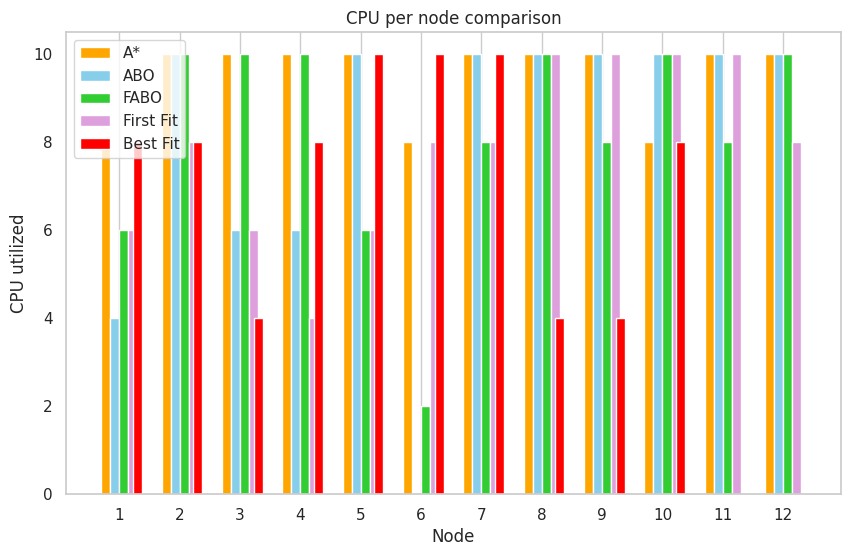

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Define node capacity for visualization
node_capacity = {n: 10 for n in range(1, 13)}

def process_results(results, method_name, slices):
    """
    Process the placement results of one method to compute:
    - number of accepted slices
    - total CPU used
    - per-node CPU usage
    - VNFs allocated per node
    """
    used_node_capacity = {n: 0 for n in range(1, 13)}
    accepted_slices = 0
    cpu_total_used = 0
    per_node_details = {n: [] for n in range(1, 13)}

    for slice_idx, result in enumerate(results):
        if result:
            accepted_slices += 1
            vnf_chain = slices[slice_idx][0]
            # Build a map {vnf_id -> cpu} for this slice
            vnf_cpu_map = {vnf["id"]: vnf["cpu"] for vnf in vnf_chain}

            for vnf_id, node in result.placed_vnfs.items():
                # Use the precomputed cpu map (avoid ID parsing errors)
                vnf_cpu = vnf_cpu_map[vnf_id]

                used_node_capacity[node] += vnf_cpu
                cpu_total_used += vnf_cpu
                per_node_details[node].append(vnf_id)

    total = len(results) if results else 1  

    return {
        "method": method_name,
        "accepted": accepted_slices,
        "total": len(results),
        "rate": accepted_slices / total,
        "cpu": cpu_total_used,
        "usage": used_node_capacity,
        "vnfs": per_node_details
    }

# ----------------- PROCESS ALL METHODS -----------------
methods_data = []
if 'results_astar_scnr3' in globals():
    methods_data.append(process_results(results_astar_scnr3, "A*", slices_3))
if 'abo_results_scnr3' in globals():
    methods_data.append(process_results(abo_results_scnr3, "ABO", slices_3))
if 'fabo_results_scnr3' in globals():
    methods_data.append(process_results(fabo_results_scnr3, "FABO", slices_3))
if 'ff_results_scnr3' in globals():
    methods_data.append(process_results(ff_results_scnr3, "First Fit", slices_3))
if 'bestfit_results_scnr3' in globals():
    methods_data.append(process_results(bestfit_results_scnr3, "Best Fit", slices_3))

# ----------------- CHECK FOR OVERCAPACITY -----------------
for method in methods_data:
    for node, cpu_used in method["usage"].items():
        if cpu_used > node_capacity[node]:
            print(f"[ALERT] Overcapacity in {method['method']} on node {node}: "
                  f"{cpu_used} > {node_capacity[node]}")

# ----------------- SUMMARY TABLE -----------------
summary_table = pd.DataFrame([
    {
        "Method": data["method"],
        "Slices Accepted": data["accepted"],
        "Total Slices": data["total"],
        "Acceptance Rate": round(data["rate"], 2),
        "Total CPU utilized": data["cpu"]
    }
    for data in methods_data
])
display(summary_table)

# ----------------- PLOT COMPARISON -----------------
fig, ax = plt.subplots(figsize=(10, 6))
nodes = list(node_capacity.keys())
bar_width = 0.15
colors = ["orange", "skyblue", "limegreen", "plum", "red"]
offsets = [-1.5, -0.5, 0.5, 1.5, 2.0]

for idx, data in enumerate(methods_data):
    usage = [data["usage"][n] for n in nodes]
    positions = [n + offsets[idx]*bar_width for n in nodes]
    ax.bar(positions, usage, width=bar_width, label=data["method"], color=colors[idx % len(colors)])

ax.set_title("CPU per node comparison")
ax.set_xlabel("Node")
ax.set_ylabel("CPU utilized")
ax.set_xticks(nodes)
ax.legend()
plt.grid(axis='y')
plt.show()



In [34]:
from compute_energy import (
    compute_energy_per_node,
    compute_total_bandwidth,
    compute_total_latency,
    compute_energy_per_slice,
    compute_total_energy_with_routing
)

# Resultados de um cenário (Cenário 2)
method_results_scnr3 = {
    "A*": results_astar_scnr3,
    "ABO": abo_results_scnr3,
    "FABO": fabo_results_scnr3,
    "First Fit": ff_results_scnr3,
    "Best-fit": bestfit_results_scnr3
}

comparison_rows_scnr3 = []

for method_name, result_list in method_results_scnr3.items():
    if not result_list:
        continue

    energy_per_slice, _ = compute_energy_per_slice(result_list, slices_3, node_capacity_base)
    _, total_energy = compute_energy_per_node(result_list, slices_3, node_capacity_base)
    total_bw = compute_total_bandwidth(result_list, slices_3)
    total_lat = compute_total_latency(result_list, link_latency)

    total_energy_with_routing = sum(
        compute_total_energy_with_routing(r, slices_3, node_capacity_base, G)
        for r in result_list if r is not None
    )

    comparison_rows_scnr3.append({
        "Method": method_name,
        "Slices Accepted": sum(1 for e in energy_per_slice if e is not None),
        "Total Energy": total_energy,
        "Total Bandwidth": sum(b for b in total_bw if b is not None),
        "Total Latency": sum(l for l in total_lat if l is not None),
        "Energy with Routing": total_energy_with_routing
    })

df_metrics_scnr3 = pd.DataFrame(comparison_rows_scnr3)
display(df_metrics_scnr3)

# Salvar opcionalmente:
df_metrics_scnr3.to_csv("metrics_scenario_2.csv", index=False)


,Method,Slices Accepted,Total Energy,Total Bandwidth,Total Latency,Energy with Routing
0,A*,8,288,2470,419.0,349.584173
1,ABO,7,247,2165,503.5,298.795007
2,FABO,7,256,2170,441.5,302.724878
3,First Fit,6,248,1890,488.5,279.863018
4,Best-fit,5,198,1555,385.5,224.532133


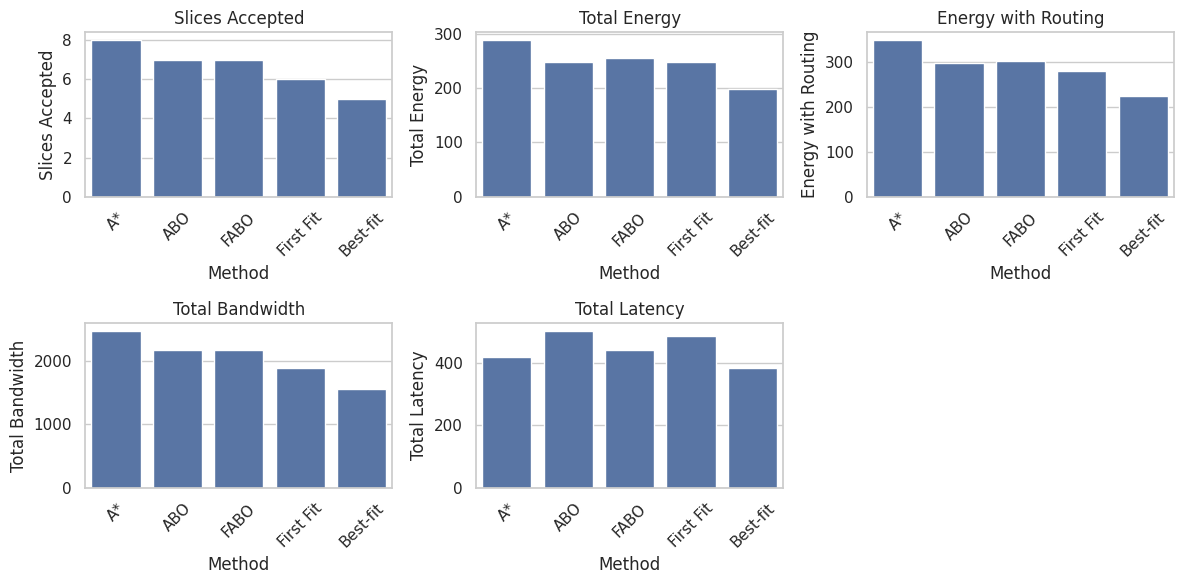

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Slices aceitos
plt.subplot(2, 3, 1)
sns.barplot(data=df_metrics_scnr3, x="Method", y="Slices Accepted")
plt.title("Slices Accepted")
plt.xticks(rotation=45)

# Energia total
plt.subplot(2, 3, 2)
sns.barplot(data=df_metrics_scnr3, x="Method", y="Total Energy")
plt.title("Total Energy")
plt.xticks(rotation=45)

# Energia com roteamento (se existir)
if "Energy with Routing" in df_metrics_scnr3.columns:
    plt.subplot(2, 3, 3)
    sns.barplot(data=df_metrics_scnr3, x="Method", y="Energy with Routing")
    plt.title("Energy with Routing")
    plt.xticks(rotation=45)

# Banda total
plt.subplot(2, 3, 4)
sns.barplot(data=df_metrics_scnr3, x="Method", y="Total Bandwidth")
plt.title("Total Bandwidth")
plt.xticks(rotation=45)

# Latência total
plt.subplot(2, 3, 5)
sns.barplot(data=df_metrics_scnr3, x="Method", y="Total Latency")
plt.title("Total Latency")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## 🏗️ Scenario 4 — High Load, Saturation Risk

**Objective:** Push the infrastructure closer to its capacity limits with a high number of concurrent slices. This scenario helps reveal the scalability bottlenecks and highlights the differences in algorithmic performance under stress.

- **Number of Slices:** 30  
- **VNFs per Slice:** 3  
- **VNF Profiles:** Randomized  
  - CPU: 2–8 cores  
  - Throughput: 140–175 Mbps  
  - Latency: 120–250 ms  
- **Inter-VNF Links:** Derived from the originating VNF’s profile

> This configuration is representative of a heavily loaded 5G slice orchestration environment, where service demands begin to compete aggressively for CPU and link resources.


In [36]:
vnf_profiles = [
    {"cpu": 2, "throughput": 140, "latency": 120},
    {"cpu": 4, "throughput": 150, "latency": 180},
    {"cpu": 6, "throughput": 160, "latency": 200},
    {"cpu": 8, "throughput": 175, "latency": 250}
]

from generate_slices import generate_random_slices
from copy import deepcopy

slices_4 = generate_random_slices(G, vnf_profiles, num_slices=30, num_vnfs_per_slice=3)
slices_4 = deepcopy(slices_4)

slices_4


[([{'id': 'vnf0_0', 'cpu': 8, 'throughput': 175, 'latency': 250, 'slice': 0},
   {'id': 'vnf0_1', 'cpu': 8, 'throughput': 175, 'latency': 250, 'slice': 0},
   {'id': 'vnf0_2', 'cpu': 6, 'throughput': 160, 'latency': 200, 'slice': 0}],
  [{'from': 'vnf0_0', 'to': 'vnf0_1', 'bandwidth': 175, 'latency': 250},
   {'from': 'vnf0_1', 'to': 'vnf0_2', 'bandwidth': 175, 'latency': 250}]),
 ([{'id': 'vnf1_0', 'cpu': 2, 'throughput': 140, 'latency': 120, 'slice': 1},
   {'id': 'vnf1_1', 'cpu': 2, 'throughput': 140, 'latency': 120, 'slice': 1},
   {'id': 'vnf1_2', 'cpu': 6, 'throughput': 160, 'latency': 200, 'slice': 1}],
  [{'from': 'vnf1_0', 'to': 'vnf1_1', 'bandwidth': 140, 'latency': 120},
   {'from': 'vnf1_1', 'to': 'vnf1_2', 'bandwidth': 140, 'latency': 120}]),
 ([{'id': 'vnf2_0', 'cpu': 6, 'throughput': 160, 'latency': 200, 'slice': 2},
   {'id': 'vnf2_1', 'cpu': 2, 'throughput': 140, 'latency': 120, 'slice': 2},
   {'id': 'vnf2_2', 'cpu': 6, 'throughput': 160, 'latency': 200, 'slice': 2}],

In [37]:

df_astar_scnr4, results_astar_scnr4 = run_astar(G, slices_4, node_capacity_base, link_capacity_base)
df_abo_scnr4, abo_results_scnr4 = run_abo_full_batch(G, slices_4, node_capacity_base, link_latency ,link_capacity_base)
df_fabo_scnr4, fabo_results_scnr4 = run_fabo_full_batch(G, slices_4, node_capacity_base, link_latency, link_capacity_base)
df_ff_scnr4, ff_results_scnr4 = run_first_fit(G, slices_4, node_capacity_base, link_capacity_base, link_latency)
df_bestfit_scnr4, bestfit_results_scnr4 = run_best_fit(G, slices_4, node_capacity_base, link_capacity_base, link_latency)


df_astar_scnr4
df_abo_scnr4
df_fabo_scnr4
df_bestfit_scnr4

Running FABO: 100%|██████████| 30/30 [00:00<00:00, 197.37slice/s]

🔄 Starting Slice 1
✅ Placed vnf0_0 on Node 1
✅ Placed vnf0_1 on Node 2
→ Routed VL vnf0_0->vnf0_1 via [1, 2]
✅ Placed vnf0_2 on Node 3
→ Routed VL vnf0_1->vnf0_2 via [2, 4, 3]
🔄 Starting Slice 2
✅ Placed vnf1_0 on Node 1
✅ Placed vnf1_1 on Node 2
→ Routed VL vnf1_0->vnf1_1 via [1, 2]
✅ Placed vnf1_2 on Node 4
❌ Not enough bandwidth for VL vnf1_1->vnf1_2
🔄 Starting Slice 3
✅ Placed vnf2_0 on Node 5
✅ Placed vnf2_1 on Node 3
→ Routed VL vnf2_0->vnf2_1 via [5, 8, 11, 3]
✅ Placed vnf2_2 on Node 6
→ Routed VL vnf2_1->vnf2_2 via [3, 11, 8, 5, 6]
🔄 Starting Slice 4
✅ Placed vnf3_0 on Node 7
✅ Placed vnf3_1 on Node 4
❌ Not enough bandwidth for VL vnf3_0->vnf3_1
🔄 Starting Slice 5
✅ Placed vnf4_0 on Node 3
✅ Placed vnf4_1 on Node 8
❌ Not enough bandwidth for VL vnf4_0->vnf4_1
🔄 Starting Slice 6
✅ Placed vnf5_0 on Node 5
✅ Placed vnf5_1 on Node 9
→ Routed VL vnf5_0->vnf5_1 via [5, 8, 9]
✅ Placed vnf5_2 on Node 6
❌ Not enough bandwidth for VL vnf5_1->vnf5_2
🔄 Starting Slice 7
✅ Placed vnf6_0 on N

,slice,accepted,g_cost
0,1,True,93.0
1,2,True,73.5
2,3,True,125.0
3,4,True,106.0
4,5,False,NaN
5,6,True,87.0
6,7,True,70.0
7,8,False,NaN
8,9,True,71.0
9,10,False,NaN


,Method,Slices Accepted,Total Slices,Acceptance Rate,Total CPU utilized
0,A*,9,30,0.30,120
1,ABO,8,30,0.27,114
2,FABO,8,30,0.27,110
3,First Fit,5,30,0.17,68
4,Best Fit,8,30,0.27,110


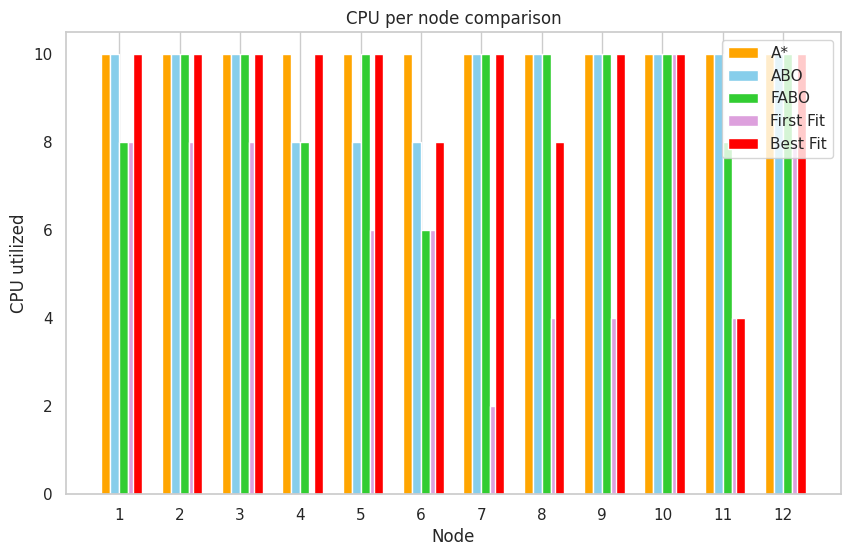

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Define node capacity for visualization
node_capacity = {n: 10 for n in range(1, 13)}

def process_results(results, method_name, slices):
    """
    Process the placement results of one method to compute:
    - number of accepted slices
    - total CPU used
    - per-node CPU usage
    - VNFs allocated per node
    """
    used_node_capacity = {n: 0 for n in range(1, 13)}
    accepted_slices = 0
    cpu_total_used = 0
    per_node_details = {n: [] for n in range(1, 13)}

    for slice_idx, result in enumerate(results):
        if result:
            accepted_slices += 1
            vnf_chain = slices[slice_idx][0]
            # Build a map {vnf_id -> cpu} for this slice
            vnf_cpu_map = {vnf["id"]: vnf["cpu"] for vnf in vnf_chain}

            for vnf_id, node in result.placed_vnfs.items():
                # Use the precomputed cpu map (avoid ID parsing errors)
                vnf_cpu = vnf_cpu_map[vnf_id]

                used_node_capacity[node] += vnf_cpu
                cpu_total_used += vnf_cpu
                per_node_details[node].append(vnf_id)

    total = len(results) if results else 1  

    return {
        "method": method_name,
        "accepted": accepted_slices,
        "total": len(results),
        "rate": accepted_slices / total,
        "cpu": cpu_total_used,
        "usage": used_node_capacity,
        "vnfs": per_node_details
    }

# ----------------- PROCESS ALL METHODS -----------------
methods_data = []
if 'results_astar_scnr4' in globals():
    methods_data.append(process_results(results_astar_scnr4, "A*", slices_4))
if 'abo_results_scnr4' in globals():
    methods_data.append(process_results(abo_results_scnr4, "ABO", slices_4))
if 'fabo_results_scnr4' in globals():
    methods_data.append(process_results(fabo_results_scnr4, "FABO", slices_4))
if 'ff_results_scnr4' in globals():
    methods_data.append(process_results(ff_results_scnr4, "First Fit", slices_4))
if 'bestfit_results_scnr4' in globals():
    methods_data.append(process_results(bestfit_results_scnr4, "Best Fit", slices_4))

# ----------------- CHECK FOR OVERCAPACITY -----------------
for method in methods_data:
    for node, cpu_used in method["usage"].items():
        if cpu_used > node_capacity[node]:
            print(f"[ALERT] Overcapacity in {method['method']} on node {node}: "
                  f"{cpu_used} > {node_capacity[node]}")

# ----------------- SUMMARY TABLE -----------------
summary_table = pd.DataFrame([
    {
        "Method": data["method"],
        "Slices Accepted": data["accepted"],
        "Total Slices": data["total"],
        "Acceptance Rate": round(data["rate"], 2),
        "Total CPU utilized": data["cpu"]
    }
    for data in methods_data
])
display(summary_table)

# ----------------- PLOT COMPARISON -----------------
fig, ax = plt.subplots(figsize=(10, 6))
nodes = list(node_capacity.keys())
bar_width = 0.15
colors = ["orange", "skyblue", "limegreen", "plum", "red"]
offsets = [-1.5, -0.5, 0.5, 1.5, 2.0]

for idx, data in enumerate(methods_data):
    usage = [data["usage"][n] for n in nodes]
    positions = [n + offsets[idx]*bar_width for n in nodes]
    ax.bar(positions, usage, width=bar_width, label=data["method"], color=colors[idx % len(colors)])

ax.set_title("CPU per node comparison")
ax.set_xlabel("Node")
ax.set_ylabel("CPU utilized")
ax.set_xticks(nodes)
ax.legend()
plt.grid(axis='y')
plt.show()



NameError: name 'df_metrics_scnr4' is not defined

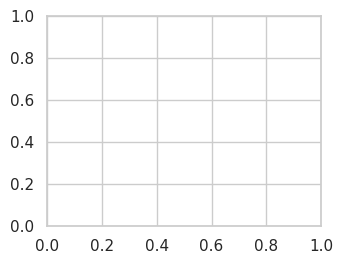

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Slices aceitos
plt.subplot(2, 3, 1)
sns.barplot(data=df_metrics_scnr4, x="Method", y="Slices Accepted")
plt.title("Slices Accepted")
plt.xticks(rotation=45)

# Energia total
plt.subplot(2, 3, 2)
sns.barplot(data=df_metrics_scnr4, x="Method", y="Total Energy")
plt.title("Total Energy")
plt.xticks(rotation=45)

# Energia com roteamento (se existir)
if "Energy with Routing" in df_metrics_scnr4.columns:
    plt.subplot(2, 3, 3)
    sns.barplot(data=df_metrics_scnr4, x="Method", y="Energy with Routing")
    plt.title("Energy with Routing")
    plt.xticks(rotation=45)

# Banda total
plt.subplot(2, 3, 4)
sns.barplot(data=df_metrics_scnr4, x="Method", y="Total Bandwidth")
plt.title("Total Bandwidth")
plt.xticks(rotation=45)

# Latência total
plt.subplot(2, 3, 5)
sns.barplot(data=df_metrics_scnr4, x="Method", y="Total Latency")
plt.title("Total Latency")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


/tmp/ipykernel_1010/3669795686.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


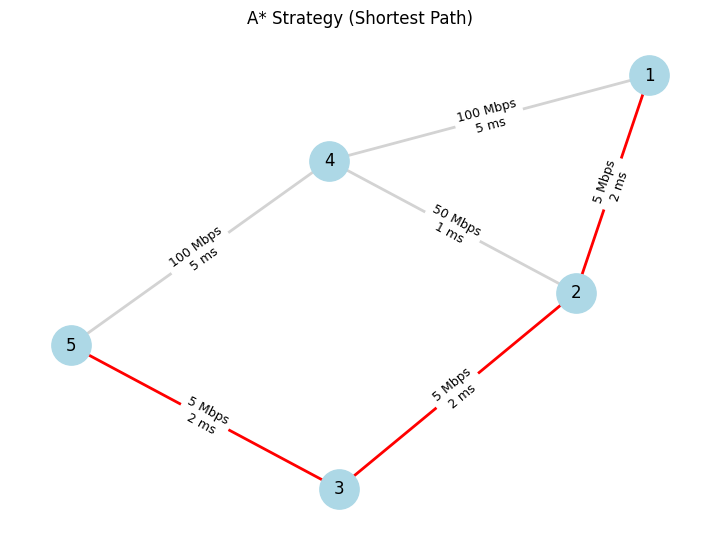

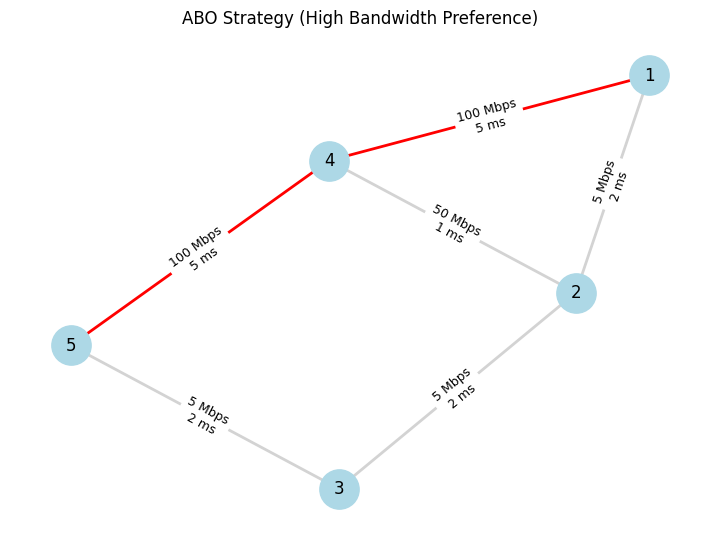

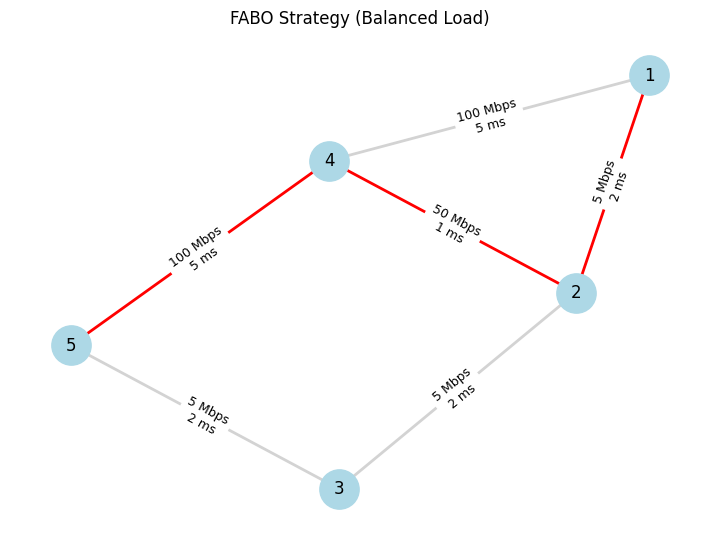

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import random

# Atualizando o grafo com valores de latência além da largura de banda


G_latency = nx.Graph()

# Tuplas: (u, v, bandwidth, latency)
edges_latency = [
    (1, 2, 5, 2),
    (2, 3, 5, 2),
    (3, 5, 5, 2),
    (1, 4, 100, 5),
    (4, 5, 100, 5),
    (2, 4, 50, 1)
]

# Adiciona nós e arestas com atributos
for u, v, bw, lat in edges_latency:
    G_latency.add_edge(u, v, bandwidth=bw, latency=lat)

pos = nx.spring_layout(G_latency, seed=42)

def plot_with_labels_and_latency(path, title):
    edge_colors = ['red' if (u, v) in zip(path, path[1:]) or (v, u) in zip(path, path[1:]) else 'lightgray' for u, v in G_latency.edges()]
    edge_labels = {
        (u, v): f'{d["bandwidth"]} Mbps\n{d["latency"]} ms' for u, v, d in G_latency.edges(data=True)
    }

    plt.figure(figsize=(7, 5))
    nx.draw(G_latency, pos, with_labels=True, node_color='lightblue', edge_color=edge_colors, width=2, node_size=800)
    nx.draw_networkx_edge_labels(G_latency, pos, edge_labels=edge_labels, font_size=9)
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    return plt

# Definindo os caminhos novamente
path_astar = [1, 2, 3, 5]
path_abo = [1, 4, 5]
path_fabo = [1, 2, 4, 5]

# Gerar os gráficos
plots = [
    plot_with_labels_and_latency(path_astar, "A* Strategy (Shortest Path)"),
    plot_with_labels_and_latency(path_abo, "ABO Strategy (High Bandwidth Preference)"),
    plot_with_labels_and_latency(path_fabo, "FABO Strategy (Balanced Load)")
    plot_with_labels_and_latency(path_fabo, "FABO Strategy (Balanced Load)")
]

# Exibir os plots
for plot in plots:
    plot.show()


/tmp/ipykernel_1010/238594445.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


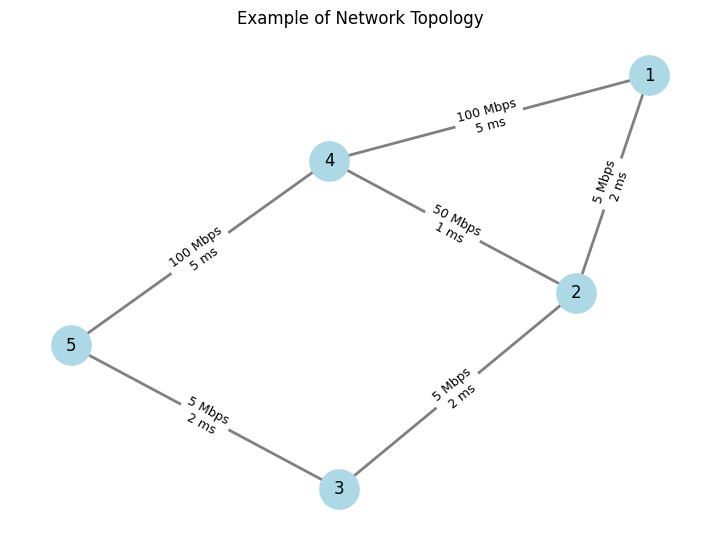

In [ ]:
# Gerar a versão limpa da topologia (sem caminhos destacados)
def plot_clean_topology():
    edge_labels = {
        (u, v): f'{d["bandwidth"]} Mbps\n{d["latency"]} ms' for u, v, d in G_latency.edges(data=True)
    }

    plt.figure(figsize=(7, 5))
    nx.draw(G_latency, pos, with_labels=True, node_color='lightblue', edge_color='gray', width=2, node_size=800)
    nx.draw_networkx_edge_labels(G_latency, pos, edge_labels=edge_labels, font_size=9)
    plt.title("Example of Network Topology")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_clean_topology()


/tmp/ipykernel_1010/1150851528.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


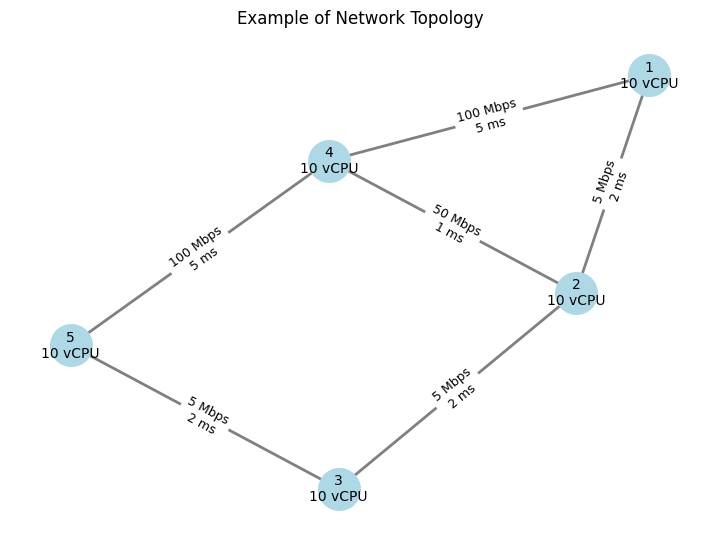

In [ ]:
# Vamos adicionar capacidade de CPU a cada nó
cpu_capacity = {
    1: 10,
    2: 10,
    3: 10,
    4: 10,
    5: 10
}

# Adiciona atributo "cpu" a cada nó
nx.set_node_attributes(G_latency, cpu_capacity, name="cpu")

def plot_topology_with_cpu():
    edge_labels = {
        (u, v): f'{d["bandwidth"]} Mbps\n{d["latency"]} ms' for u, v, d in G_latency.edges(data=True)
    }
    node_labels = {
        node: f'{node}\n{data["cpu"]} vCPU' for node, data in G_latency.nodes(data=True)
    }

    plt.figure(figsize=(7, 5))
    nx.draw(G_latency, pos, labels=node_labels, node_color='lightblue',
            edge_color='gray', width=2, node_size=900, font_size=10)
    nx.draw_networkx_edge_labels(G_latency, pos, edge_labels=edge_labels, font_size=9)
    plt.title("Example of Network Topology")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_topology_with_cpu()


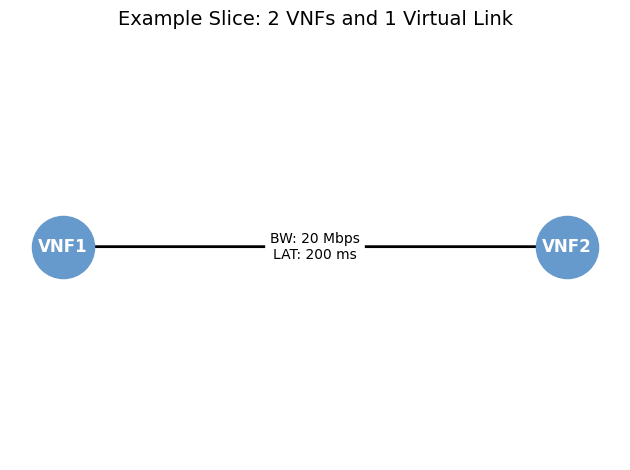

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create graph
G = nx.DiGraph()

# Add nodes for VNFs
G.add_node("VNF1", type="vnf", cpu=1, throughput=20)
G.add_node("VNF2", type="vnf", cpu=1, throughput=20)

# Add virtual link
G.add_edge("VNF1", "VNF2", bandwidth=20, latency=200)

# Positioning
pos = {
    "VNF1": (0, 0),
    "VNF2": (2, 0)
}

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color="#6699cc")
nx.draw_networkx_labels(G, pos, font_color="white", font_weight="bold")

# Draw edge with label
nx.draw_networkx_edges(G, pos, width=2, arrows=True, arrowstyle='-|>')
edge_labels = {
    ("VNF1", "VNF2"): "BW: 20 Mbps\nLAT: 200 ms"
}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.axis('off')
plt.title("Example Slice: 2 VNFs and 1 Virtual Link", fontsize=14)
plt.tight_layout()
plt.show()


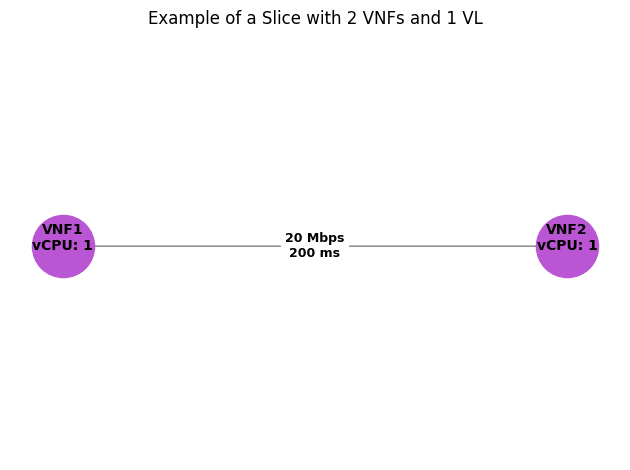

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Criação de grafo direcionado para o slice
G = nx.DiGraph()

# Adiciona VNFs com atributos
G.add_node("VNF1", vcpu=1, throughput=20)
G.add_node("VNF2", vcpu=1, throughput=20)

# Adiciona um VL com atributos de banda e latência
G.add_edge("VNF1", "VNF2", bandwidth=20, latency=200)

# Layout para os nós
pos = {
    "VNF1": (0, 0),
    "VNF2": (1, 0),
}

# Desenhar nós
node_labels = {
    node: f"{node}\nvCPU: {data['vcpu']}\n"
    for node, data in G.nodes(data=True)
}
nx.draw_networkx_nodes(G, pos, node_color='mediumorchid', node_size=2000)
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_color='black', font_weight='bold')

# Desenhar arestas
nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=20, edge_color="gray")

# Adiciona os rótulos das arestas
edge_labels = {
    (u, v): f"{d['bandwidth']} Mbps\n{d['latency']} ms"
    for u, v, d in G.edges(data=True)
}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=9, font_weight='bold')

plt.axis("off")
plt.title("Example of a Slice with 2 VNFs and 1 VL", fontsize=12)
plt.tight_layout()
plt.show()


/tmp/ipykernel_1010/2270187028.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


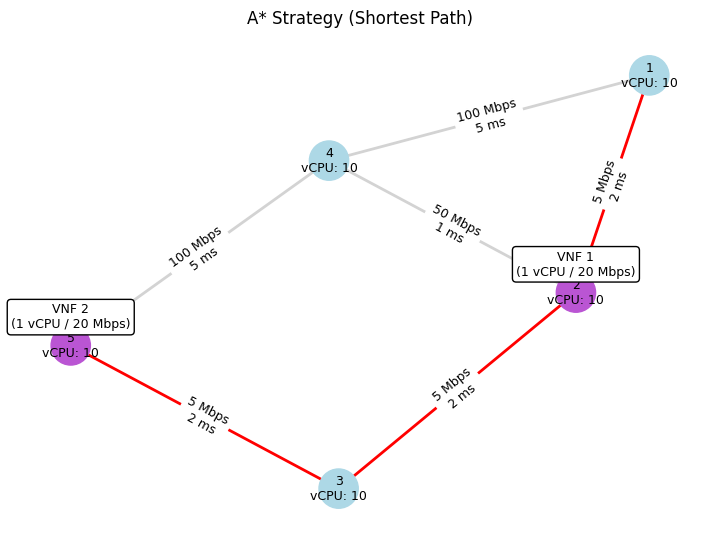

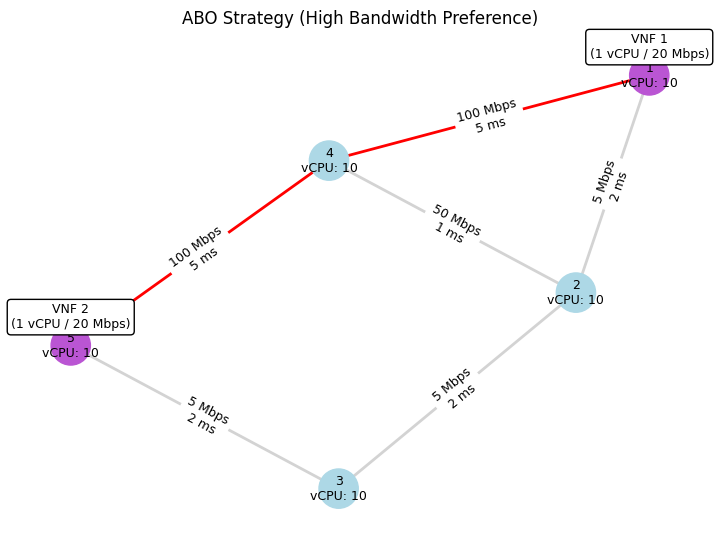

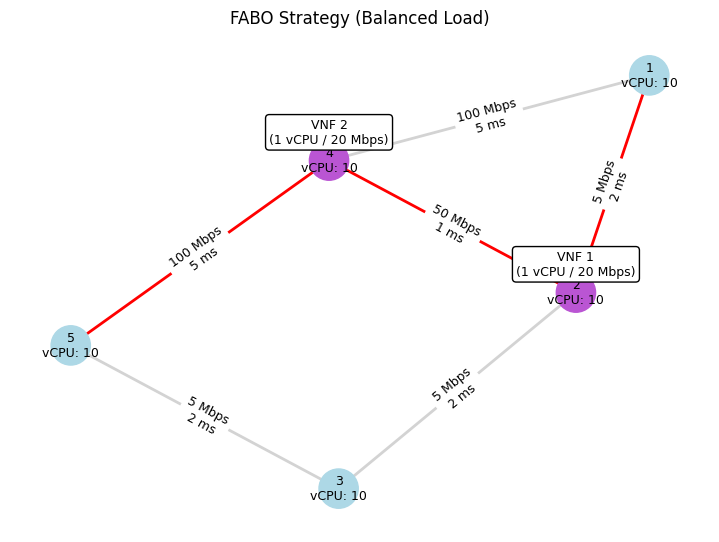

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Criando o grafo com atributos de largura de banda e latência
G_latency = nx.Graph()

edges_latency = [
    (1, 2, 5, 2),
    (2, 3, 5, 2),
    (3, 5, 5, 2),
    (1, 4, 100, 5),
    (4, 5, 100, 5),
    (2, 4, 50, 1)
]

# Adiciona nós e arestas com atributos
for u, v, bw, lat in edges_latency:
    G_latency.add_edge(u, v, bandwidth=bw, latency=lat)

# Layout fixo
pos = nx.spring_layout(G_latency, seed=42)

# Função para plotar com alocação de VNFs
def plot_with_vnfs(path, vnf_nodes, title):
    edge_colors = ['red' if (u, v) in zip(path, path[1:]) or (v, u) in zip(path, path[1:]) else 'lightgray'
                   for u, v in G_latency.edges()]
    
    edge_labels = {
        (u, v): f'{d["bandwidth"]} Mbps\n{d["latency"]} ms' for u, v, d in G_latency.edges(data=True)
    }

    node_colors = ['mediumorchid' if node in vnf_nodes else 'lightblue' for node in G_latency.nodes()]
    labels = {node: f'{node}\nvCPU: 10' for node in G_latency.nodes()}
    
    plt.figure(figsize=(7, 5))
    nx.draw(G_latency, pos, with_labels=False, node_color=node_colors, edge_color=edge_colors, width=2, node_size=800)
    nx.draw_networkx_edge_labels(G_latency, pos, edge_labels=edge_labels, font_size=9)
    nx.draw_networkx_labels(G_latency, pos, labels, font_size=9, font_color='black')

    # Adiciona informações sobre as VNFs
    for i, vnf_node in enumerate(vnf_nodes, 1):
        plt.text(pos[vnf_node][0], pos[vnf_node][1] + 0.08, f'VNF {i}\n(1 vCPU / 20 Mbps)', 
                 fontsize=9, ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    return plt

# Caminhos e alocações de VNF por estratégia
path_astar = [1, 2, 3, 5]
vnf_astar = [2, 5]

path_abo = [1, 4, 5]
vnf_abo = [1, 5]

path_fabo = [1, 2, 4, 5]
vnf_fabo = [2, 4]

# Gerar os gráficos
plots = [
    plot_with_vnfs(path_astar, vnf_astar, "A* Strategy (Shortest Path)"),
    plot_with_vnfs(path_abo, vnf_abo, "ABO Strategy (High Bandwidth Preference)"),
    plot_with_vnfs(path_fabo, vnf_fabo, "FABO Strategy (Balanced Load)")
]


